In [181]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import URLError, HTTPError
import pandas as pd
import re
from decimal import *
import json
import math
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
df_suicide = pd.read_csv("who_suicide_statistics.csv")

In [ ]:
for country in df.country.unique():
    print("* %s"%(country))

In [ ]:
df2 = pd.read_csv("who_suicide_statistics.csv")

In [ ]:
df2.groupby(df2.country).min('year')

## Process Daily Smoker

In [ ]:
df_smoker = pd.read_csv("Daily Smoker.csv")

In [ ]:
df.LOCATION.unique()

In [ ]:
countryMapping = {
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BRA': 'Brazil',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CHN': 'China', 'COL': 'Colombia',
    'CRI': 'Costa Rica', 'CZE': 'Czech Republic', 'DEU': 'Germay', 'DNK': 'Denmark', 'ESP': 'Spain',
    'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece',
    'HUN': 'Hungary', 'IDN': 'Indonesia', 'IND': 'India', 'IRL': 'Ireland', 'ISL': 'Iceland',
    'ISR': 'Isreal', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia', 'SVK': 'Slovak Republic',
    'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'Turkey', 'USA': 'United States of America', 'ZAF': 'South Africa'
}

In [ ]:
countries = []

for index,row in df.iterrows():
    countries.append(countryMapping[row['LOCATION']])

In [ ]:
df_smoker['Country'] = countries

In [ ]:
df.to_csv('Daily Smoker2.csv', index=False)

## Join data frame

In [ ]:
df_merge = pd.merge(df_suicide, df_smoker, left_on=['country', 'year'], right_on=['Country', 'TIME'], how='inner')

In [ ]:
df_merge

In [ ]:
df_join

In [ ]:
df_merge.to_csv("Suicide Detail vs Daily Smoker Inner Joined.csv", index=False)

## Calculate the suicide rate of the countries

In [ ]:
df_sum = df_suicide.groupby(['country', 'year'], as_index=False).sum()

In [ ]:
df_sum.columns

In [ ]:
df_sumnona = df_sum.dropna()

In [ ]:
v = df_sumnona[df_sumnona.suicides_no != 0]
x = v[v.population != 0]
x['suicide_rate'] = x.apply(lambda row: row['suicides_no']/row['population']*100000, axis=1)

In [ ]:
x

In [ ]:
x.to_csv("result.csv", index=False)

### Group by country name, find missing conuntry

In [ ]:
print(x.groupby('country').size().reset_index(name="counts").sort_values(['counts'], ascending=True).to_string())

In [ ]:
df_sum_rate = df_sum.apply(lambda row: row['suicides_no']/row['population']*100000, axis=1)

In [ ]:
for v in df_sum.iteritems():
    for x in v:
        print(x, "\n")

In [ ]:
df_merge2 = pd.merge(df_sum, df_smoker, left_on=['country', 'year'], right_on=['Country', 'TIME'], how='inner')

In [ ]:
df_merge2

In [ ]:
df_merge2['suicide_rate'] = df_merge2.apply(lambda row: row['suicides_no']/row['population'], axis=1)

In [ ]:
df_merge2.to_csv('suicide rate vs smoke number.csv', index=False)

## Process drug use disorder

In [ ]:
df_drug = pd.read_csv("share-with-drug-use-disorders.csv")

In [ ]:
df_sum = df2.groupby(['country', 'year']).sum()

In [ ]:
df_sum.apply(lambda row: row['suicides_no']/row['population']*100000, axis=1)

In [ ]:
df_merge = pd.merge(df_sum, df_drug, left_on=['country', 'year'], right_on=['Entity', 'Year'], how='left')

In [ ]:
df_merge_nona = df_merge.dropna()

In [ ]:
df_merge_nona[df_merge_nona.suicide_rate != 0].to_csv('temp.csv', index=False)

In [ ]:
df_merge.dropna().to_csv('temp.csv', index=False)

In [ ]:
df = df_merge_nona[df_merge_nona.suicide_rate != 0]

In [ ]:
df.to_csv('temp.csv', index=False)

In [ ]:
plt.scatter(x=df['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)'] ,y=df['suicide_rate'])

In [ ]:
df

## Process suicide data from WHO directly

Ref:
* https://www.who.int/mental_health/suicide-prevention/extraction_suicide_statistics.pdf?ua=1

In [30]:
pd_suicide_WHO = pd.read_excel("tablea.xlsx", skiprows=1, skipfooter=1)

In [138]:
pd_suicide_WHO = pd_suicide_WHO.rename(columns={'Unnamed: 42' : "FirstAvailableYear", "First available": "FirstAvailableData", "Unnamed: 2": "LastAvailableYear", "Last available": "LastAvailableData" })

In [139]:
pd_suicide_WHO

,Countries,Last available,LastAvailableYear,2016,2015,2014,2013,2012,2011,2010,...,1986,1985,1984,1983,1982,1981,1980,1979,First available,FirstAvailableYear
0,Albania,3.1,2010,NaN,NaN,NaN,NaN,NaN,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,1987
1,Anguilla,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,Antigua and Barbuda,1.1,2015,NaN,1.1,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1985
3,Argentina,6.9,2015,NaN,6.9,7.5,7.0,7.6,6.9,7.0,...,7.8,6.8,6.5,6.3,6.8,8.1,7.4,6.7,6.7,1979
4,Armenia,1.8,2016,1.8,2.0,1.5,1.9,2.4,2.0,2.3,...,2.1,2.6,NaN,NaN,2.6,3.5,NaN,NaN,3.5,1981
5,Aruba,8.5,2015,NaN,8.5,5.1,1.2,3.3,8.1,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1987
6,Australia,11.6,2015,NaN,11.6,11.2,10.2,10.3,9.7,9.8,...,12.3,11.4,10.9,10.7,11.3,11.1,10.9,11.6,11.6,1979
7,Austria,9.7,2016,9.7,10.2,11.2,10.7,10.9,11.4,11.4,...,24.4,23.8,23.1,23.3,24.1,23.5,22.6,NaN,22.6,1980
8,Azerbaijan,0.6,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,4.4,NaN,NaN,4.8,5.8,NaN,NaN,5.8,1981
9,Bahamas,1.2,2013,NaN,NaN,NaN,1.2,1.2,1.0,2.7,...,NaN,0.5,3.4,2.6,NaN,0.8,0.4,NaN,0.4,1980


In [31]:
newDataFrame = pd.DataFrame(columns=['country', 'year', 'suicide_rate'])

In [ ]:
newDataFrame.append({'country':'Taiwan', 'year': 1980, 'suicide_rate':2.6}, ignore_index=True)

In [ ]:
newDataFrame

In [32]:
for index, row in pd_suicide_WHO.iterrows():
    for year in range(1979, 2017):
        newDataFrame = newDataFrame.append({'country': row['Countries'], 'year': year, 'suicide_rate': row[str(year)]}, ignore_index=True)

In [ ]:
newDataFrame.to_csv("Adjusted Suicide Rate.csv", index=False)

## Calculate correlation with time

In [33]:
from scipy.stats.stats import pearsonr

In [ ]:
year = newDataFrame[newDataFrame.country == "Austria"].dropna()['year'].values

In [ ]:
suicide_rates = newDataFrame[newDataFrame.country == "Austria"].dropna()['suicide_rate'].values

In [ ]:
cor, p = pearsonr(year, suicide_rates)

In [34]:
df_correlation = pd.DataFrame(columns=['country', 'cor', 'p', 'from', 'until', 'supposedDatapoint', 'realDatapoint', 'numOfMissingValue', 'rateOfMissingValue'])

for country in newDataFrame['country'].unique(): 
    years = newDataFrame[newDataFrame.country == country].dropna()['year'].values
    suicide_rates = newDataFrame[newDataFrame.country == country].dropna()['suicide_rate'].values
    
    if years.size > 0:
        
        cor, p = pearsonr(years, suicide_rates)
        availFrom = min(years)
        availUntil = max(years)
        supposedDatapoint = availUntil - availFrom + 1
        realDataPoint = years.size
        numOfMissingValue = supposedDatapoint - realDataPoint
        
        df_correlation = df_correlation.append({
            "country": country,
            "cor": cor,
            "p": p,
            "from": availFrom,
            "until": availUntil,
            "supposedDatapoint": supposedDatapoint,
            "realDatapoint": realDataPoint,
            'numOfMissingValue': numOfMissingValue,
            'rateOfMissingValue': numOfMissingValue/supposedDatapoint
        }, ignore_index=True)
    

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [35]:
df_correlation.sort_values('rateOfMissingValue', ascending=False)

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue
14,Bosnia and Herzegovina,-0.851087,3.615662e-03,1985,2014,30,9,21,0.700000
35,French Guiana,-0.723818,2.282786e-03,1979,2014,36,15,21,0.583333
40,Guadeloupe,-0.358746,1.724034e-01,1981,2014,34,16,18,0.529412
29,Egypt,0.514931,2.876060e-02,1980,2015,36,18,18,0.500000
62,Martinique,-0.325869,2.018008e-01,1981,2014,34,17,17,0.500000
72,Oman,-0.989743,9.125790e-02,2009,2014,6,3,3,0.500000
111,Virgin Islands (USA),0.421041,8.185253e-02,1980,2015,36,18,18,0.500000
95,Sri Lanka,-0.839061,4.845200e-05,1980,2006,27,16,11,0.407407
50,Jamaica,0.417501,6.701280e-02,1980,2011,32,20,12,0.375000
79,Qatar,0.159071,5.712186e-01,1995,2016,22,15,7,0.318182


In [ ]:
df_correlation.to_csv("cor_suicide_rate_vs_year.csv", index=False)

## Filling missing value

The missing values will be filled by regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split  

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
years = newDataFrame[newDataFrame.country == 'Australia'].dropna()['year']
suicide_rates = newDataFrame[newDataFrame.country == 'Australia'].dropna()['suicide_rate']
reg.fit(X=years.values.reshape(-1, 1), y=suicide_rates.values)

In [ ]:
newDataFrame[newDataFrame.country == 'Australia'].dropna().iloc[:, :-1].values

In [ ]:
newDataFrame[newDataFrame.country == 'Australia'].dropna().iloc[:,:]

In [280]:
newDataFrame[(newDataFrame.country == 'Australia') & (newDataFrame.suicide_rate.isnull())]

,country,year,suicide_rate
254,Australia,2005,NaN
265,Australia,2016,NaN


In [285]:
for row in newDataFrame[(newDataFrame.country == 'Australia') & (newDataFrame.suicide_rate.isnull())].iterrows():
    newDataFrame['suicide']

254
265


1.6

In [306]:
for country in newDataFrame['country'].unique(): 
    
    years = newDataFrame[newDataFrame.country == country].dropna()['year'].values
    suicide_rates = newDataFrame[newDataFrame.country == country].dropna()['suicide_rate'].values
    
    if years.size > 0:
        reg.fit(X=years.reshape(-1, 1), y=suicide_rates)
        print("%s, coef: %f, intercept: %f"%(country, reg.coef_, reg.intercept_))
        for row in newDataFrame[(newDataFrame.country == country) & (newDataFrame.suicide_rate.isnull())].iterrows():            
            newDataFrame['suicide_rate'][row[0]] = row[1][1] * reg.coef_ + reg.intercept_            
        

Albania, coef: 0.012864, intercept: -22.736288


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Antigua and Barbuda, coef: 0.005108, intercept: -9.665098
Argentina, coef: 0.012494, intercept: -17.777691
Armenia, coef: -0.031633, intercept: 65.502797
Aruba, coef: 0.073857, intercept: -142.340042
Australia, coef: -0.046080, intercept: 103.269340
Austria, coef: -0.430844, intercept: 877.447937
Azerbaijan, coef: -0.177752, intercept: 356.852016
Bahamas, coef: -0.008131, intercept: 17.609619
Bahrain, coef: -0.032702, intercept: 67.715670
Barbados, coef: -0.103658, intercept: 209.516579
Belarus, coef: 0.006293, intercept: 11.711014
Belgium, coef: -0.137032, intercept: 290.333523
Belize, coef: 0.191807, intercept: -378.531781
Bosnia and Herzegovina, coef: -0.284648, intercept: 576.363535
Brazil, coef: 0.035941, intercept: -67.390801
Brunei Darussalam, coef: -0.079850, intercept: 161.788421
Bulgaria, coef: -0.186975, intercept: 384.931513
Canada, coef: -0.137563, intercept: 286.190084
Cabo Verde, coef: 0.000000, intercept: 9.600000
Chile, coef: 0.180566, intercept: -352.525590
Colombia, 

In [308]:
newDataFrame.to_csv("Adjusted Suicide Rate(fillna).csv", index=False)

## GDP

In [315]:
pd_gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv", skiprows=4)

In [316]:
new_pd_gdp = pd.DataFrame(columns=['country', 'year', 'gdp'])

In [318]:
pd_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [320]:
for index, row in pd_gdp.iterrows():
    for year in range(1960, 2018):
        new_pd_gdp = new_pd_gdp.append({'country': row['Country Name'], 'year': year, 'gdp': row[str(year)]}, ignore_index=True)

## Use Adjusted Suicide Rate(fillna) And Smoke Pre

In [5]:
pd_adjusted_suicide_rate = pd.read_csv("Adjusted Suicide Rate(fillna).csv")

Smoking data download from http://ghdx.healthdata.org/record/global-smoking-prevalence-and-cigarette-consumption-1980-2012

In [10]:
pd_smoke_prevalence = pd.read_csv("IHME_GLOBAL_TOBACCO_PREVALENCE_1980_2012_BOTH_SEXES.csv")

In [11]:
pd_smoke_prevalence.head(20)

,ISO,Country,Age,Sex,Smoking Prevalence (%) 1980,Smoking Prevalence (%) 1980 Lower Bound,Smoking Prevalence (%) 1980 Upper Bound,Smoking Prevalence (%) 1981,Smoking Prevalence (%) 1981 Lower Bound,Smoking Prevalence (%) 1981 Upper Bound,...,Smoking Prevalence (%) 2009 Upper Bound,Smoking Prevalence (%) 2010,Smoking Prevalence (%) 2010 Lower Bound,Smoking Prevalence (%) 2010 Upper Bound,Smoking Prevalence (%) 2011,Smoking Prevalence (%) 2011 Lower Bound,Smoking Prevalence (%) 2011 Upper Bound,Smoking Prevalence (%) 2012,Smoking Prevalence (%) 2012 Lower Bound,Smoking Prevalence (%) 2012 Upper Bound
0,NaN,Global,10,Both,2.3,1.9,2.8,2.2,1.8,2.7,...,1.5,1.2,1.0,1.5,1.2,1.0,1.5,1.2,1.0,1.5
1,NaN,Global,15,Both,10.5,8.7,12.7,10.3,8.7,12.4,...,6.3,5.5,4.8,6.3,5.5,4.7,6.4,5.5,4.7,6.6
2,NaN,Global,20,Both,24.0,21.8,26.3,23.8,21.7,26.0,...,17.1,16.2,15.2,17.2,16.2,15.2,17.3,16.3,15.0,17.6
3,NaN,Global,25,Both,28.4,25.9,30.9,28.4,26.0,30.7,...,20.0,18.9,17.9,20.0,18.9,17.8,20.1,19.0,17.6,20.4
4,NaN,Global,30,Both,30.4,28.1,32.7,30.4,28.3,32.7,...,21.9,20.7,19.6,21.7,20.5,19.3,21.7,20.5,19.2,21.8
5,NaN,Global,35,Both,30.6,28.2,33.0,30.5,28.2,32.7,...,23.9,22.5,21.3,23.7,22.4,21.0,23.7,22.3,20.6,23.9
6,NaN,Global,40,Both,31.2,28.9,33.6,31.1,28.8,33.3,...,25.4,23.9,22.6,25.3,23.8,22.2,25.3,23.7,21.9,25.7
7,NaN,Global,45,Both,31.6,29.3,34.0,31.6,29.5,33.9,...,26.2,24.9,23.7,26.3,24.9,23.4,26.4,24.9,23.1,26.6
8,NaN,Global,50,Both,31.1,28.7,33.3,31.1,28.9,33.3,...,25.9,24.6,23.3,25.9,24.5,23.1,26.0,24.5,22.8,26.2
9,NaN,Global,55,Both,28.3,25.8,30.7,28.3,26.0,30.6,...,24.1,22.7,21.2,24.1,22.6,21.0,24.2,22.6,20.9,24.4


In [12]:
pd_smoke_prevalence_process = pd.DataFrame(columns=['country', 'year', 'smoke_prevalence'])

In [13]:
for index, row in pd_smoke_prevalence[pd_smoke_prevalence['Age'] == 'Age-standardized'].iterrows():
    for year in range(1980, 2013):
        pd_smoke_prevalence_process = pd_smoke_prevalence_process.append({"country":row['Country'], "year":year, "smoke_prevalence":row['Smoking Prevalence (%) '+str(year)]}, ignore_index=True)

In [46]:
pd_smoke_prevalence_process.to_csv("Smoke_prevalence.csv")

In [165]:
len(pd_smoke_prevalence_process['country'].unique())

188

## Correlation with suicide rate

In [3]:
from scipy.stats.stats import pearsonr

In [14]:
pd_adjusted_suicide_rate.head()

,country,year,suicide_rate
0,Albania,1979,2.721614
1,Albania,1980,2.734478
2,Albania,1981,2.747342
3,Albania,1982,2.760206
4,Albania,1983,2.773070


In [15]:
pd_adjusted_suicide_rate['year'].dtype

dtype('int64')

In [16]:
pd_smoke_prevalence_process['year'] = pd_smoke_prevalence_process['year'].astype(pd_adjusted_suicide_rate['year'].dtype)

In [17]:
df_merge_suicide_smoke_prevalece = pd.merge(pd_adjusted_suicide_rate, pd_smoke_prevalence_process, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

In [62]:
cor, p = pearsonr(df_merge_suicide_smoke_prevalece[df_merge_suicide_smoke_prevalece['country']=='Brazil']['suicide_rate'], df_merge_suicide_smoke_prevalece[df_merge_suicide_smoke_prevalece['country']=='Brazil']['smoke_prevalence'])

In [19]:
pd_suicide_rate_suicide_smoke_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

In [76]:
df_merge_suicide_smoke_prevalece.shape

(3465, 4)

In [ ]:


for country in df_merge_suicide_smoke_prevalece.country.unique():    
    suicide_rate_list = df_merge_suicide_smoke_prevalece[df_merge_suicide_smoke_prevalece['country'] == country]['suicide_rate']
    smoke_prevalence_list = df_merge_suicide_smoke_prevalece[df_merge_suicide_smoke_prevalece['country'] == country]['smoke_prevalence']
    cor, p = pearsonr(smoke_prevalence_list, suicide_rate_list)
    print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_suicide_smoke_cor = pd_suicide_rate_suicide_smoke_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)

In [41]:
df_temp = pd.merge(df_correlation, 
         pd_suicide_rate_suicide_smoke_cor.rename(columns={"cor": 'smoking_cor', 'p': 'smoking_p'}), 
                                                  left_on=['country'], right_on=['country'], how='inner').sort_values(by=['p', 'cor'], ascending=[False, False])

In [52]:
df_temp.head()

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p
9,Belarus,0.011190,0.954931,1981,2014,34,28,6,0.176471,0.147225,4.135851e-01
28,Fiji,0.023641,0.944994,2001,2012,12,11,1,0.083333,-0.092210,6.097911e-01
33,Greece,0.019527,0.908675,1979,2015,37,37,0,0.000000,-0.152203,3.977923e-01
70,Sao Tome and Principe,0.266164,0.828488,1984,1987,4,3,1,0.250000,-0.877333,2.093758e-11
0,Albania,0.053009,0.814764,1987,2010,24,22,2,0.083333,-0.058028,7.483919e-01


In [113]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint>= 15)].shape

(77, 11)

In [ ]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor > 0.7)]

In [119]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor > 0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p
74,Slovakia,-0.555386,7.289983e-03,1992,2014,23,22,1,0.043478,0.710862,3.554989e-06
78,Sri Lanka,-0.839061,4.845200e-05,1980,2006,27,16,11,0.407407,0.929161,6.095976e-15
50,Luxembourg,-0.778370,1.419584e-08,1979,2015,37,37,0,0.000000,0.736053,1.052077e-06
36,Guyana,0.856651,1.186380e-08,1979,2013,35,27,8,0.228571,0.817124,6.576858e-09
73,Singapore,-0.781656,1.124532e-08,1979,2015,37,37,0,0.000000,0.711078,3.520040e-06
26,El Salvador,-0.861204,4.056419e-09,1981,2014,34,28,6,0.176471,0.859943,1.441194e-10
23,Denmark,-0.914131,2.749440e-09,1994,2015,22,22,0,0.000000,0.940548,4.366506e-16
60,Norway,-0.871025,3.856248e-10,1986,2015,30,30,0,0.000000,0.852204,3.135636e-10
80,Sweden,-0.883741,9.782968e-11,1987,2016,30,30,0,0.000000,0.925057,1.417667e-14
20,Cuba,-0.928804,5.891504e-11,1992,2015,24,24,0,0.000000,0.872770,3.568430e-11


In [117]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor <= 0.7) & (df_temp.smoking_cor > 0.3)].shape

(14, 11)

In [92]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor <= 0.3) & (df_temp.smoking_cor > 0)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p


In [120]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor <=-0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p
62,Panama,0.526682,2.335499e-03,1979,2015,37,31,6,0.162162,-0.709913,3.712694e-06
21,Cyprus,0.880335,1.490104e-05,1999,2016,18,15,3,0.166667,-0.759210,3.026958e-07
64,Philippines,0.914342,1.845446e-06,1992,2011,20,15,5,0.250000,-0.857190,1.910148e-10
14,Bulgaria,-0.768422,7.050558e-08,1980,2014,35,35,0,0.000000,-0.724885,1.834577e-06
71,Serbia,-0.955410,6.830492e-10,1998,2015,18,18,0,0.000000,-0.760455,2.819891e-07
16,Chile,0.838852,1.676896e-10,1980,2015,36,36,0,0.000000,-0.867584,6.384581e-11
89,Uruguay,0.864819,8.621435e-11,1980,2015,36,33,3,0.083333,-0.734327,1.148578e-06
13,Brazil,0.899766,3.672460e-14,1979,2015,37,37,0,0.000000,-0.814751,7.891681e-09
19,Croatia,-0.936885,3.124339e-15,1985,2016,32,32,0,0.000000,-0.907306,3.372978e-13
63,Paraguay,0.937348,9.621531e-16,1979,2014,36,33,3,0.083333,-0.923633,1.879192e-14


In [115]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor >=-0.7) & (df_temp.smoking_cor < -0.3)].shape

(12, 11)

In [109]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p < 0.05) & (df_temp.smoking_cor >=-0.3) & (df_temp.smoking_cor < 0)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p


In [121]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15) & (df_temp.smoking_p > 0.05)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,smoking_cor,smoking_p
9,Belarus,0.011190,9.549305e-01,1981,2014,34,28,6,0.176471,0.147225,0.413585
33,Greece,0.019527,9.086748e-01,1979,2015,37,37,0,0.000000,-0.152203,0.397792
0,Albania,0.053009,8.147637e-01,1987,2010,24,22,2,0.083333,-0.058028,0.748392
1,Antigua and Barbuda,0.049905,8.047537e-01,1985,2015,31,27,4,0.129032,-0.148752,0.408704
58,New Zealand,0.064622,7.122682e-01,1979,2013,35,35,0,0.000000,-0.044140,0.807303
53,Mauritius,-0.082324,6.331299e-01,1981,2016,36,36,0,0.000000,0.158836,0.377300
67,Qatar,0.159071,5.712186e-01,1995,2016,22,15,7,0.318182,0.185205,0.302137
69,Saint Lucia,-0.112827,5.386734e-01,1979,2014,36,32,4,0.111111,0.170645,0.342382
7,Bahrain,-0.200836,3.826986e-01,1985,2014,30,21,9,0.300000,-0.164861,0.359231
77,Spain,0.157087,3.602156e-01,1980,2015,36,36,0,0.000000,0.163498,0.363272


In [88]:
pd_suicide_rate_suicide_smoke_cor[(pd_suicide_rate_suicide_smoke_cor.p < 0.05) & (pd_suicide_rate_suicide_smoke_cor.cor < -0.7)]

,country,cor,p
5,Austria,-0.902905,6.709139e-13
14,Brazil,-0.814751,7.891681e-09
15,Bulgaria,-0.724885,1.834577e-06
17,Chile,-0.867584,6.384581e-11
20,Croatia,-0.907306,3.372978e-13
22,Cyprus,-0.759210,3.026958e-07
62,Mexico,-0.903041,6.571363e-13
71,Panama,-0.709913,3.712694e-06
72,Paraguay,-0.923633,1.879192e-14
74,Philippines,-0.857190,1.910148e-10


In [90]:
pd_suicide_rate_suicide_smoke_cor.to_csv("pd_suicide_rate_suicide_smoke_cor.csv")

### Depression

In [5]:
pd_adjusted_suicide_rate = pd.read_csv("Adjusted Suicide Rate(fillna).csv")

In [123]:
pd_depression = pd.read_csv("share-with-depression.csv")

In [124]:
pd_depression.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent) (%)
0,Afghanistan,AFG,1990,4.426541
1,Afghanistan,AFG,1991,4.422243
2,Afghanistan,AFG,1992,4.425022
3,Afghanistan,AFG,1993,4.425854
4,Afghanistan,AFG,1994,4.425465


In [129]:
len(pd_depression['Year'].unique())

27

In [130]:
pd_adjusted_suicide_rate.head()

,country,year,suicide_rate
0,Albania,1979,2.721614
1,Albania,1980,2.734478
2,Albania,1981,2.747342
3,Albania,1982,2.760206
4,Albania,1983,2.773070


In [132]:
df_merge_suicide_depression_prevalece = pd.merge(pd_adjusted_suicide_rate, pd_depression, left_on=['country', 'year'], right_on=['Entity', 'Year'], how='inner')

In [133]:
df_merge_suicide_depression_prevalece = df_merge_suicide_depression_prevalece.rename(columns={"Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent) (%)": 'depression_rate'})

In [134]:
df_merge_suicide_depression_prevalece.head()

,country,year,suicide_rate,Entity,Code,Year,depression_rate
0,Albania,1990,2.863118,Albania,ALB,1990,2.369954
1,Albania,1991,2.875982,Albania,ALB,1991,2.371030
2,Albania,1992,1.600000,Albania,ALB,1992,2.379187
3,Albania,1993,2.500000,Albania,ALB,1993,2.385054
4,Albania,1994,1.800000,Albania,ALB,1994,2.390555


In [20]:
cor, p = pearsonr(df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Brazil']['suicide_rate'], df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Brazil']['depression_rate'])
print("cor: %f, p: %f"%(cor, p))

cor: -0.247983, p: 0.212332


In [136]:
pd_suicide_rate_depression_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

In [ ]:

for country in df_merge_suicide_depression_prevalece.country.unique():    
    suicide_rate_list = df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country'] == country]['suicide_rate']
    depression_prevalence_list = df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country'] == country]['depression_rate']
    cor, p = pearsonr(depression_prevalence_list, suicide_rate_list)
    print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_depression_cor = pd_suicide_rate_depression_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)

In [138]:
df_temp = pd.merge(df_correlation, 
         pd_suicide_rate_depression_cor.rename(columns={"cor": 'depression_cor', 'p': 'depression_p'}), 
                                                  left_on=['country'], right_on=['country'], how='inner').sort_values(by=['p', 'cor'], ascending=[False, False])

In [147]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,depression_cor,depression_p
10,Belarus,0.011190,9.549305e-01,1981,2014,34,28,6,0.176471,0.658262,1.896651e-04
34,Greece,0.019527,9.086748e-01,1979,2015,37,37,0,0.000000,-0.254391,2.003718e-01
0,Albania,0.053009,8.147637e-01,1987,2010,24,22,2,0.083333,-0.023573,9.070894e-01
1,Antigua and Barbuda,0.049905,8.047537e-01,1985,2015,31,27,4,0.129032,0.409998,3.367043e-02
59,New Zealand,0.064622,7.122682e-01,1979,2013,35,35,0,0.000000,0.550562,2.922590e-03
7,Bahamas,-0.085505,6.715297e-01,1980,2013,34,27,7,0.205882,0.041762,8.361464e-01
54,Mauritius,-0.082324,6.331299e-01,1981,2016,36,36,0,0.000000,0.658166,1.902177e-04
45,Kazakhstan,-0.103402,5.668907e-01,1981,2015,35,33,2,0.057143,0.394153,4.191484e-02
71,Saint Lucia,-0.112827,5.386734e-01,1979,2014,36,32,4,0.111111,-0.243280,2.214129e-01
8,Bahrain,-0.200836,3.826986e-01,1985,2014,30,21,9,0.300000,0.355575,6.872770e-02


In [157]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & (df_temp.depression_p < 0.05) & (df_temp.depression_cor >= 0.7)].shape

(28, 11)

In [158]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) 
        & (df_temp.rateOfMissingValue < 0.5) & (df_temp.depression_p < 0.05) & (df_temp.depression_cor >= 0.3) & (df_temp.depression_cor < 0.7)].shape

(13, 11)

In [154]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & (df_temp.depression_p < 0.05) & (df_temp.depression_cor <= -0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,depression_cor,depression_p
11,Belgium,-0.817012,6.919418e-10,1979,2015,37,37,0,0.0,-0.719828,2.311242e-05
17,Chile,0.838852,1.676896e-10,1980,2015,36,36,0,0.0,-0.825336,1.172383e-07


In [155]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & (df_temp.depression_p < 0.05) & (df_temp.depression_cor <= -0.3) & (df_temp.depression_cor > -0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,depression_cor,depression_p
4,Australia,-0.455426,5.252823e-03,1979,2015,37,36,1,0.027027,-0.605703,0.000814
3,Armenia,-0.580538,4.951701e-04,1981,2016,36,32,4,0.111111,-0.481694,0.010957
53,Malta,0.804663,1.952823e-09,1979,2015,37,37,0,0.000000,-0.541737,0.003516


In [160]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & (df_temp.depression_p > 0.05)].shape

(23, 11)

In [ ]:
pd_suicide_rate_depression_cor[(pd_suicide_rate_depression_cor.p < 0.05) & (pd_suicide_rate_depression_cor.cor < -0.7)]

In [28]:
pd_suicide_rate_depression_cor.to_csv("pd_suicide_rate_depression_cor.csv")

In [171]:
df_merge_suicide_depression_prevalece.head()

,country,year,suicide_rate,Entity,Code,Year,depression_rate
0,Albania,1990,2.863118,Albania,ALB,1990,2.369954
1,Albania,1991,2.875982,Albania,ALB,1991,2.371030
2,Albania,1992,1.600000,Albania,ALB,1992,2.379187
3,Albania,1993,2.500000,Albania,ALB,1993,2.385054
4,Albania,1994,1.800000,Albania,ALB,1994,2.390555


In [205]:
df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['suicide_rate'].values

array([ 15.7       ,  14.9       ,  15.5       ,  17.9       ,
        17.7       ,  17.9       ,  16.8       ,  17.9       ,
        16.6       ,  15.3       ,  17.6       ,  17.6       ,
        16.7       ,  17.        ,  16.        ,  15.8       ,
        15.2       ,  14.2       ,  15.4       ,  15.3       ,
        15.3       ,  15.4       ,  14.8       ,  13.7       ,
        13.5       ,  13.3       ,  14.07747748])

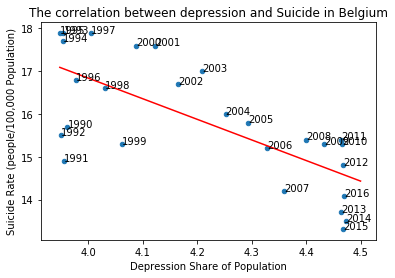

In [211]:
r = LinearRegression()
r.fit(X=df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['depression_rate'].values.reshape(-1, 1),
     y=df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['suicide_rate'].values)
xn = np.linspace(df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['depression_rate'].values.min(), 4.5, 10)
ax = df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium'].plot.scatter(x='depression_rate', y='suicide_rate')
for i, txt in enumerate(df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['year']):
    ax.annotate(txt, (df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['depression_rate'].values[i], 
                df_merge_suicide_depression_prevalece[df_merge_suicide_depression_prevalece['country']=='Belgium']['suicide_rate'].values[i]))
    
ax = plt.plot(xn.reshape(-1, 1), r.predict(xn.reshape(-1, 1)), c='r')
plt.xlabel("Depression Share of Population")
plt.ylabel("Suicide Rate (people/100,000 Population)")
plt.title("The correlation between depression and Suicide in Belgium")
plt.savefig("depression1.eps")
plt.show()

### Drug Disorder

In [212]:
pd_adjusted_suicide_rate = pd.read_csv("Adjusted Suicide Rate(fillna).csv")
pd_drug_use_disorder= pd.read_csv("share-with-drug-use-disorders.csv")
pd_drug_use_disorder.head()
df_merge_suicide_drug_disorder_prevalece = pd.merge(pd_adjusted_suicide_rate, pd_drug_use_disorder, left_on=['country', 'year'], right_on=['Entity', 'Year'], how='inner')
df_merge_suicide_drug_disorder_prevalece = df_merge_suicide_drug_disorder_prevalece.rename(columns={"Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)": 'drug_use_disorder_rate'})


In [213]:
df_merge_suicide_drug_disorder_prevalece.head()

,country,year,suicide_rate,Entity,Code,Year,drug_use_disorder_rate
0,Albania,1990,2.863118,Albania,ALB,1990,0.612334
1,Albania,1991,2.875982,Albania,ALB,1991,0.611797
2,Albania,1992,1.600000,Albania,ALB,1992,0.612318
3,Albania,1993,2.500000,Albania,ALB,1993,0.611318
4,Albania,1994,1.800000,Albania,ALB,1994,0.607857


In [ ]:
pd_suicide_rate_drug_disorder_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge_suicide_drug_disorder_prevalece.country.unique():    
    suicide_rate_list = df_merge_suicide_drug_disorder_prevalece[df_merge_suicide_drug_disorder_prevalece['country'] == country]['suicide_rate']
    drug_disorder_prevalence_list = df_merge_suicide_drug_disorder_prevalece[df_merge_suicide_drug_disorder_prevalece['country'] == country]['drug_use_disorder_rate']
    cor, p = pearsonr(drug_disorder_prevalence_list, suicide_rate_list)
    print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_drug_disorder_cor = pd_suicide_rate_drug_disorder_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)

In [216]:
df_temp = pd.merge(df_correlation, 
         pd_suicide_rate_drug_disorder_cor.rename(columns={"cor": 'drug_disorder_cor', 'p': 'drug_disorder_p'}), 
                                                  left_on=['country'], right_on=['country'], how='inner').sort_values(by=['p', 'cor'], ascending=[False, False])

In [218]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
10,Belarus,0.011190,9.549305e-01,1981,2014,34,28,6,0.176471,-0.636012,3.629409e-04
34,Greece,0.019527,9.086748e-01,1979,2015,37,37,0,0.000000,0.627801,4.554281e-04
0,Albania,0.053009,8.147637e-01,1987,2010,24,22,2,0.083333,-0.066521,7.416554e-01
1,Antigua and Barbuda,0.049905,8.047537e-01,1985,2015,31,27,4,0.129032,-0.123706,5.387226e-01
59,New Zealand,0.064622,7.122682e-01,1979,2013,35,35,0,0.000000,0.386599,4.637197e-02
7,Bahamas,-0.085505,6.715297e-01,1980,2013,34,27,7,0.205882,-0.145103,4.702119e-01
54,Mauritius,-0.082324,6.331299e-01,1981,2016,36,36,0,0.000000,-0.800065,5.483538e-07
45,Kazakhstan,-0.103402,5.668907e-01,1981,2015,35,33,2,0.057143,0.539323,3.695531e-03
71,Saint Lucia,-0.112827,5.386734e-01,1979,2014,36,32,4,0.111111,-0.253841,2.013785e-01
8,Bahrain,-0.200836,3.826986e-01,1985,2014,30,21,9,0.300000,0.188610,3.461069e-01


In [220]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor >= 0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
4,Australia,-0.455426,5.252823e-03,1979,2015,37,36,1,0.027027,0.762266,3.824781e-06
37,Guyana,0.856651,1.186380e-08,1979,2013,35,27,8,0.228571,0.785544,1.210073e-06
91,Uruguay,0.864819,8.621435e-11,1980,2015,36,33,3,0.083333,0.758871,4.475395e-06
48,Kyrgyzstan,-0.879742,1.566522e-11,1981,2015,35,33,2,0.057143,0.954445,1.221190e-14
14,Brazil,0.899766,3.672460e-14,1979,2015,37,37,0,0.000000,0.759652,4.317531e-06
64,Paraguay,0.937348,9.621531e-16,1979,2014,36,33,3,0.083333,0.833822,6.605220e-08
55,Mexico,0.973096,6.683106e-24,1979,2015,37,37,0,0.000000,0.967026,2.300405e-16


In [221]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor < 0.7) & (df_temp.drug_disorder_cor>=0.3)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
34,Greece,0.019527,9.086748e-01,1979,2015,37,37,0,0.000000,0.627801,0.000455
59,New Zealand,0.064622,7.122682e-01,1979,2013,35,35,0,0.000000,0.386599,0.046372
45,Kazakhstan,-0.103402,5.668907e-01,1981,2015,35,33,2,0.057143,0.539323,0.003696
81,Suriname,0.168304,3.491421e-01,1979,2014,36,33,3,0.083333,0.587986,0.001258
2,Argentina,0.213589,2.043240e-01,1979,2015,37,37,0,0.000000,0.411311,0.033050
43,Jamaica,0.417501,6.701280e-02,1980,2011,32,20,12,0.375000,0.487221,0.009949
18,Colombia,0.563633,7.816355e-04,1984,2015,32,32,0,0.000000,0.486725,0.010036
12,Belize,0.632718,1.020325e-04,1980,2015,36,32,4,0.111111,0.399990,0.038709
25,Ecuador,0.616097,4.916992e-05,1979,2015,37,37,0,0.000000,0.578818,0.001561
58,Netherlands,-0.656574,7.590544e-06,1979,2016,38,38,0,0.000000,0.673749,0.000117


In [231]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor < -0.7)].shape

(18, 11)

In [227]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor < -0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
54,Mauritius,-0.082324,6.331299e-01,1981,2016,36,36,0,0.000000,-0.800065,5.483538e-07
88,Ukraine,-0.330236,6.490049e-02,1981,2015,35,32,3,0.085714,-0.840147,4.216419e-08
9,Barbados,-0.456426,9.854456e-03,1979,2013,35,31,4,0.114286,-0.833057,6.964906e-08
87,Turkmenistan,-0.734981,1.111071e-06,1981,2015,35,33,2,0.057143,-0.814614,2.320630e-07
28,Estonia,-0.746341,6.148546e-07,1981,2015,35,33,2,0.057143,-0.734241,1.302857e-05
15,Bulgaria,-0.768422,7.050558e-08,1980,2014,35,35,0,0.000000,-0.844123,3.148438e-08
92,Uzbekistan,-0.825262,3.622299e-08,1981,2014,34,29,5,0.147059,-0.721729,2.147230e-05
75,Singapore,-0.781656,1.124532e-08,1979,2015,37,37,0,0.000000,-0.827227,1.034449e-07
27,El Salvador,-0.861204,4.056419e-09,1981,2014,34,28,6,0.176471,-0.740194,1.017224e-05
82,Sweden,-0.883741,9.782968e-11,1987,2016,30,30,0,0.000000,-0.849320,2.122590e-08


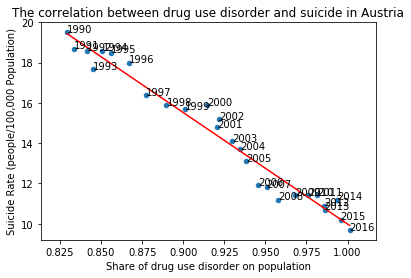

In [241]:
draw_scatter_regression(df_merge_suicide_drug_disorder_prevalece, 
                        country='Austria', 
                        field="drug_use_disorder_rate", 
                        savefig="drug_use_disorder1.eps",
                        xlabel="Share of drug use disorder on population",
                        ylabel="Suicide Rate (people/100,000 Population)",
                        title="The correlation between drug use disorder and suicide in Austria"

                       )

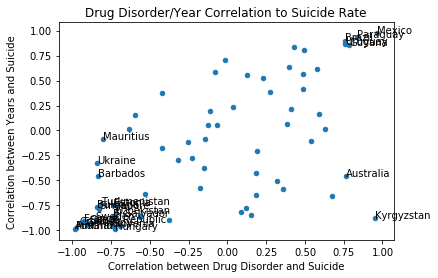

In [265]:
t = df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5)]
ax = t.plot.scatter(x='drug_disorder_cor', y='cor')
for i, txt in enumerate(t['country']):
    if abs(t['drug_disorder_cor'].values[i]) > 0.7 and abs(t['cor'].values[i]):
        ax.annotate(txt, (t['drug_disorder_cor'].values[i], 
                    t['cor'].values[i]))
plt.xlabel("Correlation between Drug Disorder and Suicide")
plt.ylabel("Correlation between Years and Suicide")
plt.title("Drug Disorder/Year Correlation to Suicide Rate")
plt.savefig("Twocorrelation.eps")
plt.show()

In [252]:
def draw_scatter_regression(dataset, country, field, xlabel="", ylabel="", title="", savefig=""):
    r = LinearRegression()
    r.fit(X=dataset[dataset['country']==country][field].values.reshape(-1, 1),
         y=dataset[dataset['country']==country]['suicide_rate'].values)
    xn = np.linspace(dataset[dataset['country']==country][field].values.min(), dataset[dataset['country']==country][field].values.max(), 10)
    ax = dataset[dataset['country']==country].plot.scatter(x=field, y='suicide_rate')
    for i, txt in enumerate(dataset[dataset['country']==country]['year']):
        ax.annotate(txt, (dataset[dataset['country']==country][field].values[i], 
                    dataset[dataset['country']==country]['suicide_rate'].values[i]))

    ax = plt.plot(xn.reshape(-1, 1), r.predict(xn.reshape(-1, 1)), c='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(savefig)
    plt.show()
    

In [393]:
def draw_correlation_regression(dataset, fieldx, fieldy, xlabel, ylabel, title, figname):
    r = LinearRegression()
    r.fit(X=dataset[fieldx].values.reshape(-1, 1),
         y=dataset[fieldy].values)
    xn = np.linspace(dataset[fieldx].values.min(), dataset[fieldx].values.max(), 10)
    ax = dataset.plot.scatter(x=fieldx, y=fieldy)
    
    for i, txt in enumerate(dataset['country']):
        ax.annotate(txt, (dataset[fieldx].values[i],
                         dataset[fieldy].values[i]))
    
    ax = plt.plot(xn.reshape(-1, 1), r.predict(xn.reshape(-1, 1)), c='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(figname)
    plt.show()

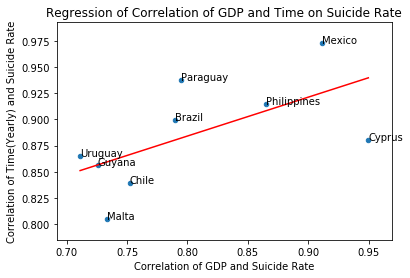

In [394]:
draw_correlation_regression(df_fast_grow_countries, 
                            'gdp_cor', 
                            'cor', 
                            'Correlation of GDP and Suicide Rate', 
                            'Correlation of Time(Yearly) and Suicide Rate',
                            'Regression of Correlation of GDP and Time on Suicide Rate',
                            'GDP_Time_Reg.eps')

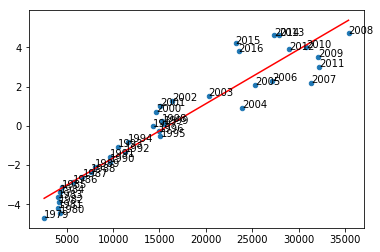

In [395]:
draw_scatter_regression(dataset=df_merge_suicide_gdp_per_capita, country='Cyprus', field='gdp')

In [228]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor > -0.7) & (df_temp.drug_disorder_cor < -0.3)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
10,Belarus,0.011190,9.549305e-01,1981,2014,34,28,6,0.176471,-0.636012,0.000363
79,Spain,0.157087,3.602156e-01,1980,2015,36,36,0,0.000000,-0.597118,0.001008
50,Lithuania,-0.175452,3.209474e-01,1981,2016,36,34,2,0.055556,-0.423060,0.027900
85,Trinidad and Tobago,0.373871,3.208715e-02,1979,2011,33,33,0,0.000000,-0.419884,0.029224
41,Israel,-0.631263,2.799197e-05,1979,2015,37,37,0,0.000000,-0.533916,0.004125
61,Norway,-0.871025,3.856248e-10,1986,2015,30,30,0,0.000000,-0.564997,0.002136
90,United Kingdom,-0.859034,1.025018e-11,1979,2015,37,37,0,0.000000,-0.561906,0.002287
16,Canada,-0.952374,1.374034e-18,1979,2013,35,35,0,0.000000,-0.693664,0.000060


In [229]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p < 0.05) & (df_temp.drug_disorder_cor > -0.3) & (df_temp.drug_disorder_cor < 0)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p


In [237]:
df_temp[(df_temp['from'] <= 1990) & (df_temp['until'] >= 2010) & (df_temp.rateOfMissingValue < 0.5) & 
        (df_temp.drug_disorder_p > 0.05)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,drug_disorder_cor,drug_disorder_p
0,Albania,0.053009,8.147637e-01,1987,2010,24,22,2,0.083333,-0.066521,0.741655
1,Antigua and Barbuda,0.049905,8.047537e-01,1985,2015,31,27,4,0.129032,-0.123706,0.538723
7,Bahamas,-0.085505,6.715297e-01,1980,2013,34,27,7,0.205882,-0.145103,0.470212
71,Saint Lucia,-0.112827,5.386734e-01,1979,2014,36,32,4,0.111111,-0.253841,0.201379
8,Bahrain,-0.200836,3.826986e-01,1985,2014,30,21,9,0.300000,0.188610,0.346107
66,Poland,0.193220,2.976662e-01,1983,2015,33,31,2,0.060606,-0.109593,0.586331
44,Japan,0.232914,1.653509e-01,1979,2015,37,37,0,0.000000,0.032919,0.870516
39,Iceland,-0.271707,1.089274e-01,1981,2016,36,36,0,0.000000,-0.228047,0.252604
67,Portugal,-0.296385,9.952791e-02,1980,2014,35,32,3,0.085714,-0.316220,0.108071
35,Grenada,-0.376392,5.806421e-02,1985,2016,32,26,6,0.187500,-0.153008,0.446100


### Merge result

In [58]:
pd_sucide_rate_vs_time = pd.read_csv("cor_suicide_rate_vs_year.csv")

In [49]:
pd_suicide_rate_suicide_smoke_cor = pd.read_csv("pd_suicide_rate_suicide_smoke_cor.csv")

In [59]:
pd_all_merge = pd.merge(pd_sucide_rate_vs_time, pd_suicide_rate_suicide_smoke_cor.rename(columns={"cor": "smoke_cor", "p":"smoke_p"}), left_on=['country'], right_on=['country'], how='inner')

In [60]:
pd_all_merge.head()

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p
0,Albania,0.053009,8.147637e-01,1987,2010,24,NaN,2,22,-0.058028,7.483919e-01
1,Antigua and Barbuda,0.049905,8.047537e-01,1985,2015,31,NaN,4,27,-0.148752,4.087037e-01
2,Argentina,0.213589,2.043240e-01,1979,2015,37,NaN,0,37,-0.201059,2.618778e-01
3,Mexico,0.973096,6.680000e-24,1979,2015,37,NaN,0,37,-0.903041,6.570000e-13
4,Paraguay,0.937348,9.620000e-16,1979,2014,36,NaN,3,33,-0.923633,1.880000e-14


In [61]:
pd_all_merge = pd.merge(pd_all_merge, pd_suicide_rate_depression_cor.rename(columns={"cor": "depression_cor", "p":"depression_p"}), left_on=['country'], right_on=['country'], how='inner')

In [62]:
pd_all_merge = pd.merge(pd_all_merge, pd_suicide_rate_drug_disorder_cor.rename(columns={"cor": "drug_disorder_cor", "p":"drug_disorder_p"}), left_on=['country'], right_on=['country'], how='inner')

#### Strong correlation between suicide rate / smoke,dpression,drug disorder

In [71]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor >= 0.7) & (pd_all_merge.depression_cor>=0.7) & (pd_all_merge.drug_disorder_cor>=0.7) ]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p
11,Guyana,0.856651,1.190000e-08,1979,2013,35,NaN,8,27,0.817124,6.580000e-09,0.781966,0.000001,0.785544,0.000001


#### Strong correlation between suicide rate / smoke,dpression

In [87]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor >= 0.7) & (pd_all_merge.depression_cor>=0.7) & (abs(pd_all_merge.drug_disorder_cor)<0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p
64,United Kingdom,-0.859034,1.030000e-11,1979,2015,37,NaN,0,37,0.893024,2.810000e-12,0.783343,1.357200e-06,-0.561906,0.002287
71,Seychelles,-0.680181,5.238027e-01,1985,1987,3,NaN,0,3,0.955159,6.100000e-18,0.979205,7.719467e-19,-0.525390,0.004890
81,Canada,-0.952374,1.370000e-18,1979,2013,35,NaN,0,35,0.958669,1.770000e-18,0.841626,3.785896e-08,-0.693664,0.000060


#### Strong correlation between suicide rate / smoke,drug disorder

In [86]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor >= 0.7) & (abs(pd_all_merge.depression_cor)<0.7) & (pd_all_merge.drug_disorder_cor>=0.7) ]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p


#### Strong correlation between suicide rate / depression, drug_disorder

In [85]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
             & (abs(pd_all_merge.smoke_cor)<0.7) & (pd_all_merge.depression_cor>=0.7) & (pd_all_merge.drug_disorder_cor>=0.7) ]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p
67,Kyrgyzstan,-0.879742,1.570000e-11,1981,2015,35,NaN,2,33,0.655424,0.000035,0.925026,5.268089e-12,0.954445,1.221190e-14
87,Switzerland,-0.966501,1.120000e-12,1995,2015,21,NaN,0,21,0.682930,0.000012,0.959182,3.176512e-15,0.966138,3.191827e-16


#### Negative correlation between suicide rate / smoke,dpression,drug disorder

In [89]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor <= -0.7) & (pd_all_merge.depression_cor<=-0.7) & (pd_all_merge.drug_disorder_cor<=-0.7) ]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p
5,Philippines,0.914342,0.000002,1992,2011,20,NaN,5,15,-0.85719,1.910000e-10,-0.815272,2.228263e-07,-0.839410,4.447303e-08
9,Cyprus,0.880335,0.000015,1999,2016,18,NaN,3,15,-0.75921,3.030000e-07,-0.821534,1.501263e-07,-0.802427,4.792180e-07


#### Negative correlation between suicide rate / smoke,dpression

In [92]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor <= -0.7) & (pd_all_merge.depression_cor<=-0.7) & (abs(pd_all_merge.drug_disorder_cor)<0.7) ]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p
12,Chile,0.838852,1.680000e-10,1980,2015,36,NaN,0,36,-0.867584,6.380000e-11,-0.825336,1.172383e-07,0.42643,0.02655


#### Negative correlation between suicide rate / smoke,drug disorder

In [94]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (pd_all_merge.smoke_cor <= -0.7) & (abs(pd_all_merge.depression_cor)<0.7) & (pd_all_merge.drug_disorder_cor<=-0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p


#### Negative correlation between suicide rate / smoke,drug disorder

In [96]:
pd_all_merge[(pd_all_merge.smoke_p <0.05) & (pd_all_merge.depression_p < 0.05) & (pd_all_merge.drug_disorder_p<0.05)
            & (abs(pd_all_merge.smoke_cor) < 0.7) & (pd_all_merge.depression_cor<=-0.7) & (pd_all_merge.drug_disorder_cor<=-0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,realDataPoint,smoke_cor,smoke_p,depression_cor,depression_p,drug_disorder_cor,drug_disorder_p


In [103]:
pd_chile = pd.merge(pd_drug_use_disorder[pd_drug_use_disorder.Entity=='Chile'], pd_adjusted_suicide_rate[pd_adjusted_suicide_rate.country=='Chile'], left_on=['Entity', 'Year'], right_on=['country', 'year'], how='inner')

,Entity,Code,Year,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%),country,year,suicide_rate
0,Chile,CHL,1990,1.013401,Chile,1990,6.1
1,Chile,CHL,1991,1.015694,Chile,1991,6.3
2,Chile,CHL,1992,1.014672,Chile,1992,5.1
3,Chile,CHL,1993,1.018354,Chile,1993,5.8
4,Chile,CHL,1994,1.018863,Chile,1994,6.1


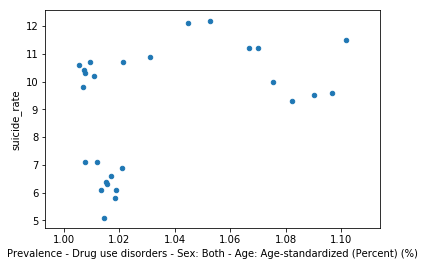

In [111]:
pd_chile.plot.scatter(x='Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)', y='suicide_rate')

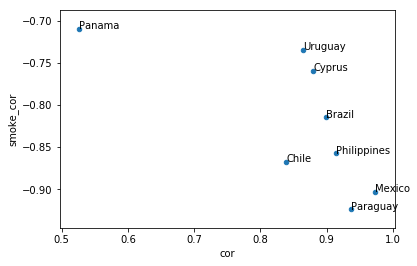

In [136]:
ax = pd_all_merge[(pd_all_merge.p <= 0.05) & (pd_all_merge.cor > 0.5) & (pd_all_merge.smoke_p <= 0.05) & (pd_all_merge.smoke_cor <= -0.7)].plot.scatter(x='cor', y='smoke_cor')
for i, txt in enumerate(pd_all_merge[(pd_all_merge.p <= 0.05) & (pd_all_merge.cor > 0.5) & (pd_all_merge.smoke_p <= 0.05) & (pd_all_merge.smoke_cor <= -0.7)]['country']):
    ax.annotate(txt, (pd_all_merge[(pd_all_merge.p <= 0.05) & (pd_all_merge.cor > 0.5) & (pd_all_merge.smoke_p <= 0.05) & (pd_all_merge.smoke_cor <= -0.7)]['cor'].values[i],
                     pd_all_merge[(pd_all_merge.p <= 0.05) & (pd_all_merge.cor > 0.5) & (pd_all_merge.smoke_p <= 0.05) & (pd_all_merge.smoke_cor <= -0.7)]['smoke_cor'].values[i]))

### GDP Per Capita

In [270]:
pd_GDP_per_capita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10224851.csv", skiprows=4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd_GDP_per_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,nan,nan,nan,nan,nan,nan,...,24631.435,24271.940,25324.720,nan,nan,nan,nan,nan,nan,nan
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777,59.878,58.493,78.783,82.208,101.290,...,445.893,553.300,603.537,669.009,638.613,629.345,569.578,561.779,585.850,nan
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,nan,nan,nan,nan,nan,nan,...,3347.845,3531.417,4299.008,4539.468,4804.634,4707.578,3683.553,3308.773,4170.312,nan
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,nan,nan,nan,nan,nan,nan,...,4114.137,4094.359,4437.178,4247.614,4413.082,4578.667,3952.831,4131.872,4537.862,nan
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,nan,nan,nan,nan,nan,nan,...,43339.380,39736.354,41098.767,38391.081,40619.711,42294.995,36038.268,37231.816,39146.549,nan


In [366]:
len(pd_GDP_per_capita['Country Name'].unique())

264

In [311]:
df_gdp_per_capida = pd.DataFrame(columns=['country', 'year', 'gdp'])
for index, row in pd_GDP_per_capita.iterrows():    
    for year in range(1960, 2018):
        df_gdp_per_capida = df_gdp_per_capida.append({'country': row['Country Name'], 'year': year, 'gdp': row[str(year)]}, ignore_index=True)

In [312]:
df_gdp_per_capida = df_gdp_per_capida.dropna()

In [326]:
df_gdp_per_capida[df_gdp_per_capida.country == 'Serbia']

,country,year,gdp
12331,Serbia,1995,2196.618
12332,Serbia,1996,2749.966
12333,Serbia,1997,3178.831
12334,Serbia,1998,2416.069
12335,Serbia,1999,2441.430
12336,Serbia,2000,870.137
12337,Serbia,2001,1634.875
12338,Serbia,2002,2149.909
12339,Serbia,2003,2832.491
12340,Serbia,2004,3331.229


In [313]:
df_gdp_per_capida.to_csv("gdp_per_capita.csv")

In [314]:
df_gdp_per_capida['year'] = df_gdp_per_capida['year'].astype(pd_adjusted_suicide_rate['year'].dtype)

In [327]:
df_merge_suicide_gdp_per_capita = pd.merge(pd_adjusted_suicide_rate, df_gdp_per_capida, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

In [328]:
df_merge_suicide_gdp_per_capita[df_merge_suicide_gdp_per_capita.country=='Serbia']

,country,year,suicide_rate,gdp
2981,Serbia,1995,16.523,2196.618
2982,Serbia,1996,16.222,2749.966
2983,Serbia,1997,15.920,3178.831
2984,Serbia,1998,15.100,2416.069
2985,Serbia,1999,16.000,2441.430
2986,Serbia,2000,15.500,870.137
2987,Serbia,2001,14.500,1634.875
2988,Serbia,2002,14.200,2149.909
2989,Serbia,2003,13.700,2832.491
2990,Serbia,2004,13.000,3331.229


In [ ]:
df_merge_suicide_gdp_per_capita_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge_suicide_gdp_per_capita.country.unique():    
    suicide_rate_list = df_merge_suicide_gdp_per_capita[df_merge_suicide_gdp_per_capita['country'] == country]['suicide_rate']
    gdp_list = df_merge_suicide_gdp_per_capita[df_merge_suicide_gdp_per_capita['country'] == country]['gdp']
    cor, p = pearsonr(gdp_list, suicide_rate_list)
    print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    df_merge_suicide_gdp_per_capita_cor = df_merge_suicide_gdp_per_capita_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)

In [336]:
df_merge_suicide_gdp_per_capita_cor = df_merge_suicide_gdp_per_capita_cor.dropna()

In [337]:
df_merge_suicide_gdp_per_capita_cor.to_csv('correlation_gdp_suicide.csv')

In [339]:
df_merge_suicide_gdp_per_capita_cor.head()

,country,cor,p
0,Albania,0.003,0.987
1,Antigua and Barbuda,0.077,0.646
2,Argentina,-0.161,0.335
3,Armenia,-0.392,0.043
4,Aruba,-0.070,0.783


In [340]:
df_temp = pd.merge(df_correlation, 
         df_merge_suicide_gdp_per_capita_cor.rename(columns={"cor": 'gdp_cor', 'p': 'gdp_p'}), 
                                                  left_on=['country'], right_on=['country'], how='inner').sort_values(by=['p', 'cor'], ascending=[False, False])

In [369]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)].shape

(78, 11)

In [371]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor >= 0.7)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,gdp_cor,gdp_p
24,Cyprus,0.880,0.000,1999,2016,18,15,3,0.167,0.950,0.000
65,Philippines,0.914,0.000,1992,2011,20,15,5,0.250,0.865,0.000
38,Guyana,0.857,0.000,1979,2013,35,27,8,0.229,0.726,0.000
53,Malta,0.805,0.000,1979,2015,37,37,0,0.000,0.734,0.000
19,Chile,0.839,0.000,1980,2015,36,36,0,0.000,0.752,0.000
90,Uruguay,0.865,0.000,1980,2015,36,33,3,0.083,0.711,0.000
14,Brazil,0.900,0.000,1979,2015,37,37,0,0.000,0.790,0.000
64,Paraguay,0.937,0.000,1979,2014,36,33,3,0.083,0.794,0.000
55,Mexico,0.973,0.000,1979,2015,37,37,0,0.000,0.912,0.000


In [387]:
df_fast_grow_countries = df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor >= 0.7)]

In [ ]:
draw_scatter_regression()

In [372]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor < 0.7) & (df_temp.gdp_cor >= 0.3)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,gdp_cor,gdp_p
69,Qatar,0.159,0.571,1995,2016,22,15,7,0.318,0.327,0.045
80,Suriname,0.168,0.349,1979,2014,36,33,3,0.083,0.526,0.001
44,Jamaica,0.418,0.067,1980,2011,32,20,12,0.375,0.567,0.000
20,Colombia,0.564,0.001,1984,2015,32,32,0,0.000,0.406,0.011
37,Guatemala,0.587,0.000,1979,2015,37,34,3,0.081,0.551,0.000
12,Belize,0.633,0.000,1980,2015,36,32,4,0.111,0.689,0.000
27,Ecuador,0.616,0.000,1979,2015,37,37,0,0.000,0.454,0.004
41,Ireland,0.707,0.000,1979,2014,36,36,0,0.000,0.602,0.000


In [374]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor < -0.7)].shape

(34, 11)

In [375]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor > -0.7) & (df_temp.gdp_cor < -0.3)].shape

(9, 11)

In [351]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p > 0.05)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,gdp_cor,gdp_p
35,Greece,0.020,0.909,1979,2015,37,37,0,0.000,-0.211,0.203
0,Albania,0.053,0.815,1987,2010,24,22,2,0.083,0.003,0.987
1,Antigua and Barbuda,0.050,0.805,1985,2015,31,27,4,0.129,0.077,0.646
59,New Zealand,0.065,0.712,1979,2013,35,35,0,0.000,-0.053,0.754
54,Mauritius,-0.082,0.633,1981,2016,36,36,0,0.000,-0.168,0.313
4,Aruba,0.164,0.489,1987,2015,29,20,9,0.310,-0.070,0.783
8,Bahrain,-0.201,0.383,1985,2014,30,21,9,0.300,-0.316,0.057
78,Spain,0.157,0.360,1980,2015,36,36,0,0.000,0.029,0.861
66,Poland,0.193,0.298,1983,2015,33,31,2,0.061,-0.258,0.193
2,Argentina,0.214,0.204,1979,2015,37,37,0,0.000,-0.161,0.335


In [353]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p < 0.05) & (df_temp.gdp_cor < 0.3) & (df_temp.gdp_cor > 0)]

,country,cor,p,from,until,supposedDatapoint,realDatapoint,numOfMissingValue,rateOfMissingValue,gdp_cor,gdp_p


In [377]:
df_temp[(df_temp.rateOfMissingValue < 0.5) & (df_temp.supposedDatapoint > 15)
       & (df_temp.gdp_p > 0.05)].shape

(18, 11)

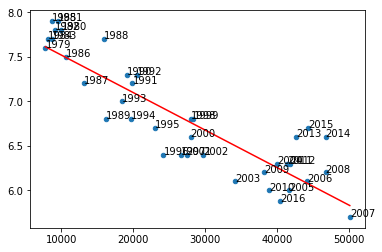

In [356]:
draw_scatter_regression(dataset=df_merge_suicide_gdp_per_capita, country='United Kingdom', field="gdp")

In [359]:
df_merge_suicide_drug_disorder_prevalece.head()

,country,year,suicide_rate,Entity,Code,Year,drug_use_disorder_rate
0,Albania,1990,2.863,Albania,ALB,1990,0.612
1,Albania,1991,2.876,Albania,ALB,1991,0.612
2,Albania,1992,1.600,Albania,ALB,1992,0.612
3,Albania,1993,2.500,Albania,ALB,1993,0.611
4,Albania,1994,1.800,Albania,ALB,1994,0.608


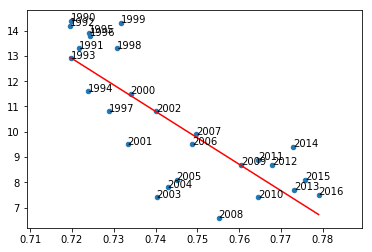

In [361]:
draw_scatter_regression(dataset=df_merge_suicide_drug_disorder_prevalece, country='Mauritius', field="drug_use_disorder_rate")